<a href="https://colab.research.google.com/github/hoaian1232812/Lab_ML/blob/main/Lab_9_20130193_HoThanhHoaiAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main aim of this lab is to deal with the pipeline technique and MultilayerPerceptron algorithm

*   **Deadline: 23:59, 24/4/2023**



# Import libraries

In [ ]:
from sklearn import datasets
from sklearn import svm
from sklearn import metrics as m
from sklearn.model_selection import train_test_split as tts, GridSearchCV as gs_cv
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np


#Task 1. With **iris** dataset
*  Apply **pipeline** including preprocessing steps (i.e., StandardScaler, **SimpleImputer**, **feature selection**, **KBinsDiscretizer**, …) and classification algorithms (i.e., **Random forest, kNN, Naïve Bayes**). 


In [ ]:
#code
data = datasets.load_iris()
x_train, x_test, y_train, y_test = tts(data['data'], data['target'], test_size=0.3, random_state=1)
pipeline = Pipeline([('scl', StandardScaler()), ('clf', RandomForestClassifier(n_estimators=100))])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('clf', RandomForestClassifier())])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



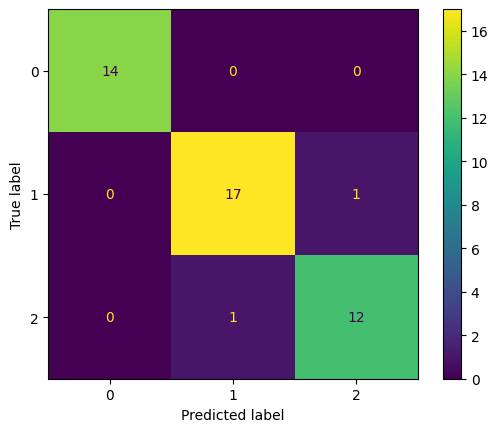

In [ ]:
y_predict = pipeline.predict(x_test)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test, y_predict))

#Task 2. With **mnist** dataset: 
*   2.1. Apply **MultilayerPerceptron** classification with 1 hidden layer 
having 10 nodes

In [ ]:
data = datasets.load_digits()
x_train, x_test, y_train, y_test = tts(data['data'], data['target'], test_size=0.3, random_state=1)
neuron = MLPClassifier(hidden_layer_sizes=[10],activation='logistic', solver='sgd', max_iter=100)
neuron.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=[10], max_iter=100,
              solver='sgd')

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 1 6 1 3 7 4 7 1 1 6 0 1 6 1 2 7 5 9 8 1 2 1 8
 1 1 0 7 1 0 0 8 7 2 7 8 3 4 2 4 0 6 7 0 4 2 5 2 1 2 0 5 1 1 2 2 6 0 5 7 4
 1 6 2 1 7 2 7 5 2 4 1 5 5 2 5 2 5 5 2 7 0 1 1 4 4 2 2 8 2 3 2 0 3 9 2 2 2
 2 8 1 1 9 1 2 0 1 1 5 6 7 7 6 2 6 6 1 7 5 6 2 8 2 7 1 1 5 8 7 1 8 5 0 6 0
 6 2 7 6 5 6 2 2 2 8 0 7 6 5 6 6 1 5 6 0 6 4 0 1 9 8 1 2 3 1 1 0 7 6 2 9 2
 5 5 4 1 2 2 7 7 7 2 7 6 1 6 1 4 0 2 1 5 9 9 9 9 1 2 6 8 0 1 5 9 8 2 2 5 8
 0 8 7 7 0 8 2 6 6 2 2 2 9 1 6 9 0 6 5 2 7 9 1 6 7 6 2 2 1 8 2 4 0 6 4 8 5
 8 6 3 9 4 0 5 6 6 7 2 1 5 2 7 0 6 0 4 7 0 1 6 6 4 7 9 5 0 2 6 0 1 1 2 0 9
 5 6 7 0 5 0 9 1 7 7 1 7 0 6 6 1 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 2 7 8
 1 6 9 8 2 2 6 8 7 5 5 6 9 9 1 2 0 0 7 9 8 0 4 9 4 2 5 6 1 6 6 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 1 7 7 0 6 9 3 1 9 2 2 1 7 0 7 5 2 5 7 1 1 9 1 3 0 0 7 3 1
 7 9 9 7 1 9 7 5 4 1 2 8 6 5 6 9 0 5 9 2 1 5 0 4 2 4 2 1 9 0 8 7 1 4 9 6 5
 7 9 2 1 1 5 2 6 1 7 1 0 1 7 2 9 5 6 5 2 5 3 2 2 5 1 6 7 6 2 5 7 2 5 2 6 7
 5 4 4 9 7 2 7 0 2 6 9 2 

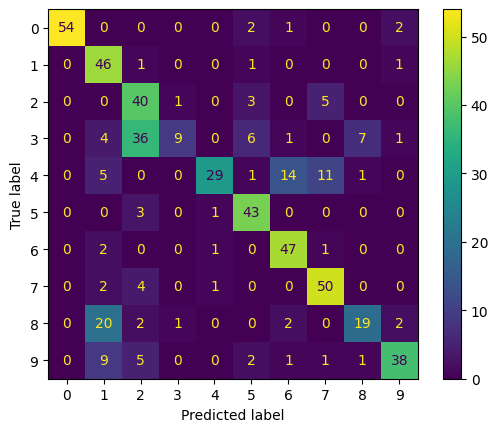

In [ ]:
y_predict= neuron.predict(x_test)
print(y_predict)
print(m.classification_report(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test,y_predict))

*   2.2. Apply **Multilayerperceptron** algorithm with the following settings (the first hidden layer has 250 neuron, the second one has 100 neurons). 

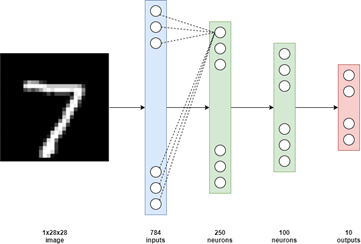

In [ ]:
# code
neuron = MLPClassifier(hidden_layer_sizes=[250,100],activation='logistic', solver='sgd', max_iter=250)
neuron.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=[250, 100],
              max_iter=250, solver='sgd')

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 7 6 1 3 7 5 9 8 3 2 1 8
 1 1 0 7 9 0 0 8 7 2 7 1 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 7 6 2 1 7 3 1 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 5 4 2 3 9 9 3 2 0 2 9 2 2 3
 2 8 1 1 9 6 2 0 4 1 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 2 1 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 2 5 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 7 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 2 6 8 0 5 5 9 8 2 2 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 6 6 7 6 5 5 1 9 3 4 0 6 4 8 9
 3 6 3 1 4 0 4 4 5 7 5 1 5 2 7 0 9 0 4 4 0 1 4 6 4 2 9 5 0 3 6 0 1 8 2 0 9
 5 6 7 0 5 0 9 6 4 7 1 7 0 6 6 1 0 2 2 6 9 9 7 5 9 7 6 4 6 2 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 1 7 0 0 4 9 9 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 2 2 2 9 8 7 0 1 3 9 9 2 1 1 9 8 3 0 0 7 3 1
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 6 4 5 0 4 3 4 2 7 9 0 8 7 1 6 9 4 5
 7 8 3 7 8 5 2 6 6 7 1 0 1 4 7 9 5 4 5 2 5 3 3 3 5 1 0 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 3 4 0 2 6 9 3 

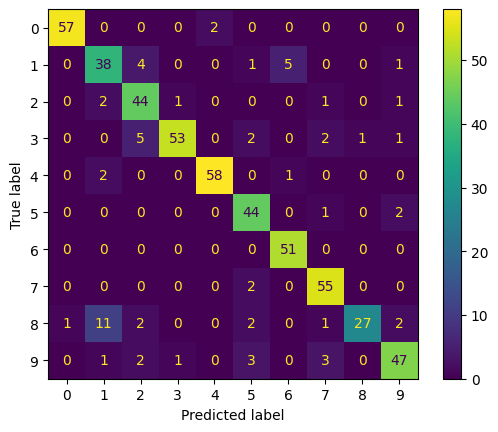

In [ ]:
y_predict= neuron.predict(x_test)
print(y_predict)
print(m.classification_report(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test,y_predict))

*   2.3. Find the best hyper parameters using **GridSearchCV**

In [ ]:
values = data['target_names']
y_predicts =[]
classfications=['Neuron', 'Random Forest', 'KNN']

In [ ]:
def predict_GridSearchCV(clf, param_grid, x_train=None, x_test=None, y_train=None, y_test=None):
  grid_class = gs_cv(estimator=clf, param_grid=param_grid, n_jobs=2,scoring='accuracy',refit = True, return_train_score=True,cv=5)
  grid_class.fit(x_train, y_train)
  y_predict = grid_class.predict(x_test)
  print(grid_class.best_params_)
  print(y_predict)
  print(m.classification_report(y_test, y_predict))
  print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
  return y_predict

In [ ]:
def score_metrix_GridSearchCV(y_predicts=[], classification=[],average='binary', y_test=None, pos=0):
  result = []
  for i in range(len(classification)):
    ac = m.accuracy_score(y_test, y_predicts[i])
    ps = m.precision_score(y_test, y_predicts[i],average=average,pos_label=pos)
    rs = m.recall_score(y_test, y_predicts[i],average=average,pos_label=pos)
    fs = m.f1_score(y_test, y_predicts[i],average=average,pos_label=pos)
    result.append([classification[i], ac, ps, rs, fs])
  return result

In [ ]:
def printPrettyTable(values=[], y_predicts=[], classification=[], y_test = None,average='binary'):
  for label in values:
    rows = score_metrix_GridSearchCV(y_predicts=y_predicts, classification=classification, y_test=y_test, pos = label,average=average)
    t = PrettyTable(['Classification','Accuracy','Precision','Recall','F1'])
    for r in rows:
      t.add_row(r)
    print('Label:', label)
    print(t)

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 150, 'solver': 'adam'}
[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 5 9 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 9 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 8 0 4 4 0 1 0 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 9 3 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 9 9 2 8 1 9 8 3 0 0 7 3 8
 7 9 9 7 1 2 4 5 4 1 7 3 6 5 4 9 0 

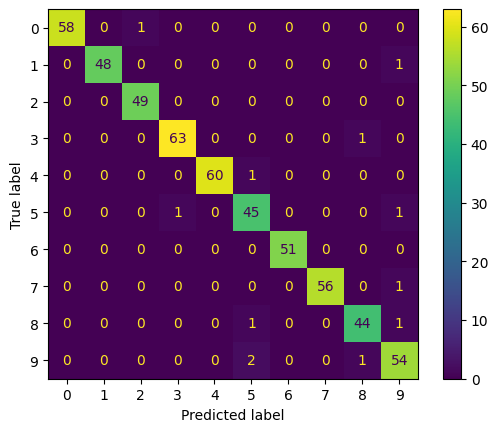

In [ ]:
#code
param_grid = {
 'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
 'max_iter': [50, 100, 150],
 'activation': ['tanh', 'relu'],
 'solver': ['sgd', 'adam'],
 'alpha': [0.0001, 0.05],
 'learning_rate': ['constant','adaptive'],
}

y_predict = predict_GridSearchCV(MLPClassifier(), param_grid, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
y_predicts.append(y_predict)

*   2.4. Compare the MultilayerPerceptron using the best hyper parameters in 2.3 and other classification algorithms (i.e., Random forest, kNN, Naïve Bayes)  in termns of accuracy, precision, recall, and F1

{'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 9, 'n_estimators': 50}
[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 7 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 1 3 4 3 4 0 0 7 0 5 5 5 2 1 7 0 0 1 8 3 3 4 0 3 7 4
 1 0 2 1 7 3 2 5 3 4 1 5 5 2 5 2 6 6 2 7 0 8 1 7 4 2 3 8 9 3 3 0 2 9 5 2 3
 2 8 1 1 9 6 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 1 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 0 6 4 1 0 6 0 6 4 0 9 2 5 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 9 3 7 4 7 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 7 0 3 3 0 6 3 3 2 9 2 6 9 0 4 2 2 7 9 6 6 7 6 2 5 1 9 3 6 0 6 4 8 5
 3 6 3 2 4 0 4 4 5 7 7 1 5 2 7 0 9 0 4 4 0 1 8 6 4 2 8 5 0 9 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 2 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 9 7 6 4 6 2 9 4 7 1 3 7 8
 1 6 9 8 2 2 6 8 7 5 5 6 9 8 9 5 0 0 4 9 6 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 3 3 9 8 7 0 2 3 8 9 2 2 1 9 8 3 0 0 7 3 8
 7 9 3 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 2 4 5 0 1 3 4 2 7 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 6 2 6 6

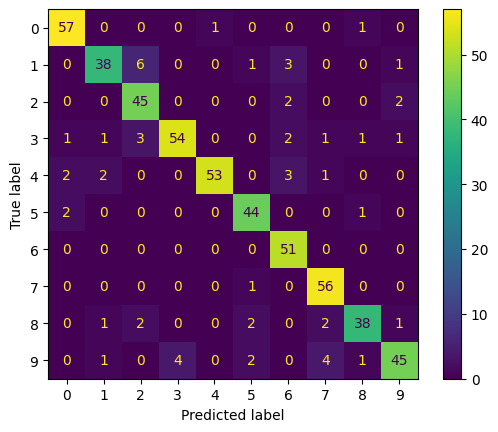

In [ ]:
#Random forest
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
y_predict = predict_GridSearchCV(RandomForestClassifier(), param_grid, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
y_predicts.append(y_predict)

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 9 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 7 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 7 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 8 5 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 9 9 2 8 1 9 3 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 3 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3 2 6 6 7 1 0 8 4 8 9 5 4

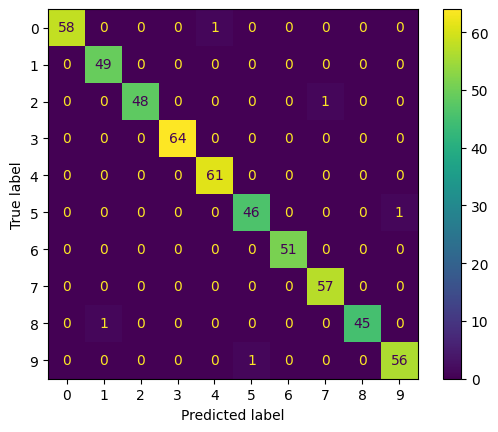

In [ ]:
#KNN
param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
y_predict = predict_GridSearchCV(KNeighborsClassifier(), param_grid, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
y_predicts.append(y_predict)

In [ ]:
printPrettyTable(values=values,y_predicts=y_predicts, classification=classfications, average='macro',y_test=y_test)

Label: 0
+----------------+--------------------+--------------------+--------------------+--------------------+
| Classification |      Accuracy      |     Precision      |       Recall       |         F1         |
+----------------+--------------------+--------------------+--------------------+--------------------+
|     Neuron     | 0.9777777777777777 | 0.9770298568827831 | 0.9774417350613953 | 0.9771455856582468 |
| Random Forest  | 0.8907407407407407 | 0.8914990640286163 | 0.8906768698801155 | 0.8880672080303158 |
|      KNN       | 0.9907407407407407 | 0.9907809133037787 | 0.9902083098363734 | 0.9904407503143926 |
+----------------+--------------------+--------------------+--------------------+--------------------+
Label: 1
+----------------+--------------------+--------------------+--------------------+--------------------+
| Classification |      Accuracy      |     Precision      |       Recall       |         F1         |
+----------------+--------------------+----------------

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a sing

#Task 3. With **spambase** dataset: 

*   3.1. Apply **GridSearchCV** to **MultilayperPerceptron** to find the best hyperparameters (the setting of hyperparameters chosen by students)

In [ ]:
#code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Lab_ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Lab_ML


In [ ]:
data = pd.read_csv('spambase.csv')
x = data.drop(columns='class')
y= data['class']
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=1)

In [ ]:
values = y.unique()
y_predicts =[]
classfications=['Neuron', 'Random Forest', 'KNN']
print(values)

[1 0]


{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (120, 80, 40), 'learning_rate': 'adaptive', 'max_iter': 150, 'solver': 'adam'}
[0 1 1 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       841
           1       0.94      0.92      0.93       540

    accuracy                           0.95      1381
   macro avg       0.95      0.94      0.94      1381
weighted avg       0.95      0.95      0.95      1381



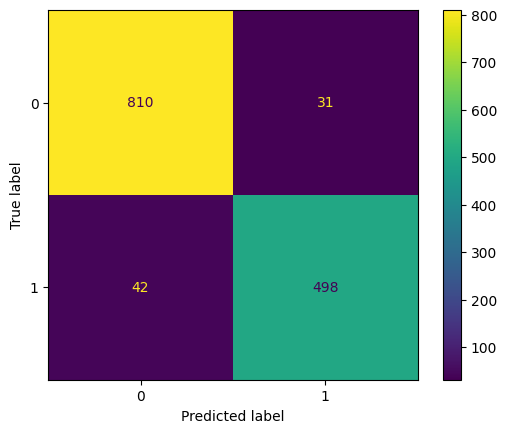

In [ ]:
#neuron
#code
param_grid = {
 'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
 'max_iter': [50, 100, 150],
 'activation': ['tanh', 'relu'],
 'solver': ['sgd', 'adam'],
 'alpha': [0.0001, 0.05],
 'learning_rate': ['constant','adaptive'],
}

y_predict = predict_GridSearchCV(MLPClassifier(), param_grid, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
y_predicts.append(y_predict)

*   3.2. Compare the **MultilayerPerceptron** using the best hyper parameters in 3.1) and other classification algorithms (i.e., Random forest, kNN, Naïve Bayes)  in termns of accuracy, precision, recall, and F1

{'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 100}
[0 0 1 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       841
           1       0.95      0.84      0.89       540

    accuracy                           0.92      1381
   macro avg       0.93      0.90      0.91      1381
weighted avg       0.92      0.92      0.92      1381



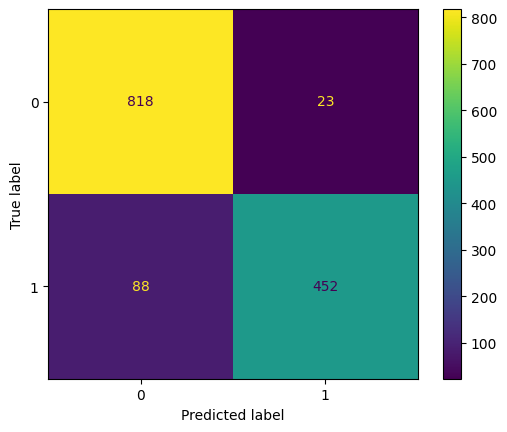

In [ ]:
#Random forest
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
y_predict = predict_GridSearchCV(RandomForestClassifier(), param_grid, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
y_predicts.append(y_predict)

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
[0 0 0 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       841
           1       0.84      0.81      0.83       540

    accuracy                           0.87      1381
   macro avg       0.86      0.86      0.86      1381
weighted avg       0.87      0.87      0.87      1381



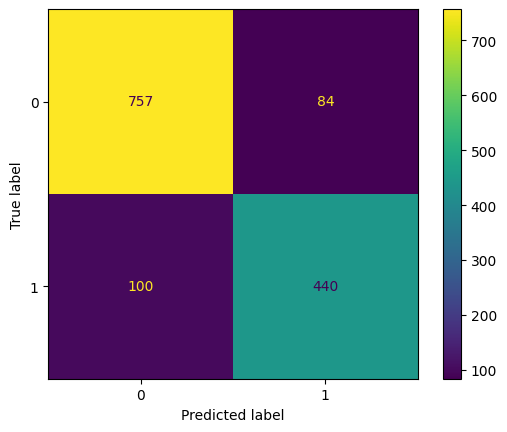

In [ ]:
#KNN
param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
y_predict = predict_GridSearchCV(KNeighborsClassifier(), param_grid, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
y_predicts.append(y_predict)

In [ ]:
printPrettyTable(values=values,y_predicts=y_predicts, classification=classfications, y_test=y_test)

Label: 1
+----------------+--------------------+--------------------+--------------------+--------------------+
| Classification |      Accuracy      |     Precision      |       Recall       |         F1         |
+----------------+--------------------+--------------------+--------------------+--------------------+
|     Neuron     | 0.9471397538015931 | 0.941398865784499  | 0.9222222222222223 | 0.9317118802619272 |
| Random Forest  | 0.9196234612599565 | 0.9515789473684211 | 0.837037037037037  |  0.89064039408867  |
|      KNN       | 0.8667632150615496 | 0.8396946564885496 | 0.8148148148148148 | 0.8270676691729323 |
+----------------+--------------------+--------------------+--------------------+--------------------+
Label: 0
+----------------+--------------------+--------------------+--------------------+--------------------+
| Classification |      Accuracy      |     Precision      |       Recall       |         F1         |
+----------------+--------------------+----------------

#Finally,
Save a copy in your Github. Remember renaming the notebook.